# Segmentation Analysis for Fast Food


STEP 1: Load the Data

In [ ]:
import pandas as pd
# Load the dataset
file_path = '/content/mcdonalds.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


STEP 2 :Exploratory Data Analysis

In [ ]:
# Summary statistics
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Check for missing values
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [ ]:
# Check the data types
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [ ]:
# Visualize some key variables
import matplotlib.pyplot as plt
import seaborn as sns

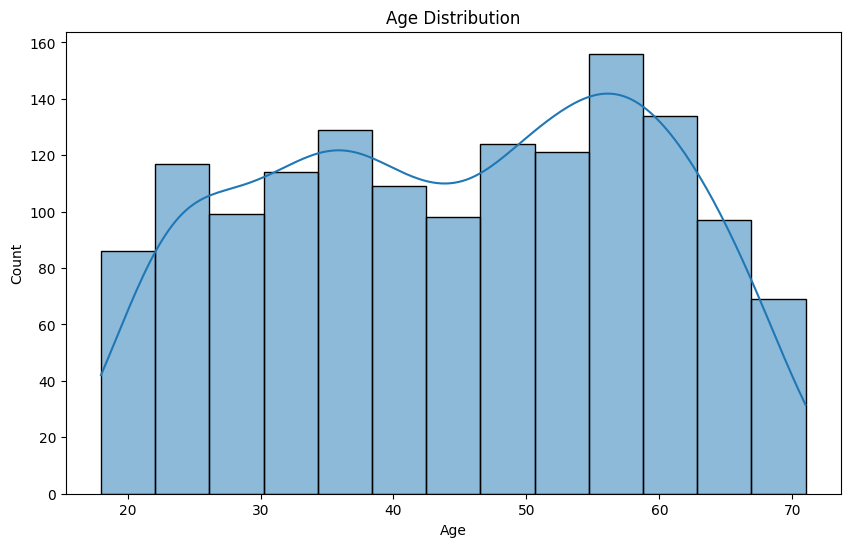

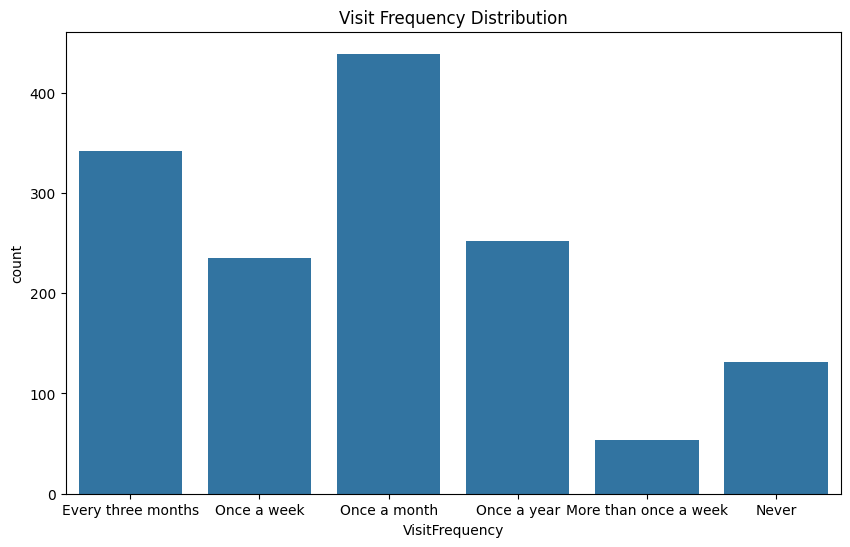

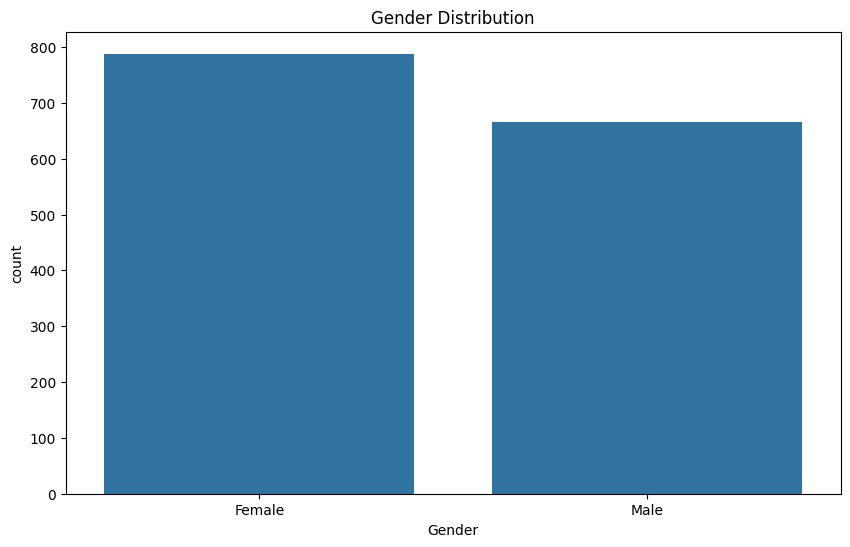

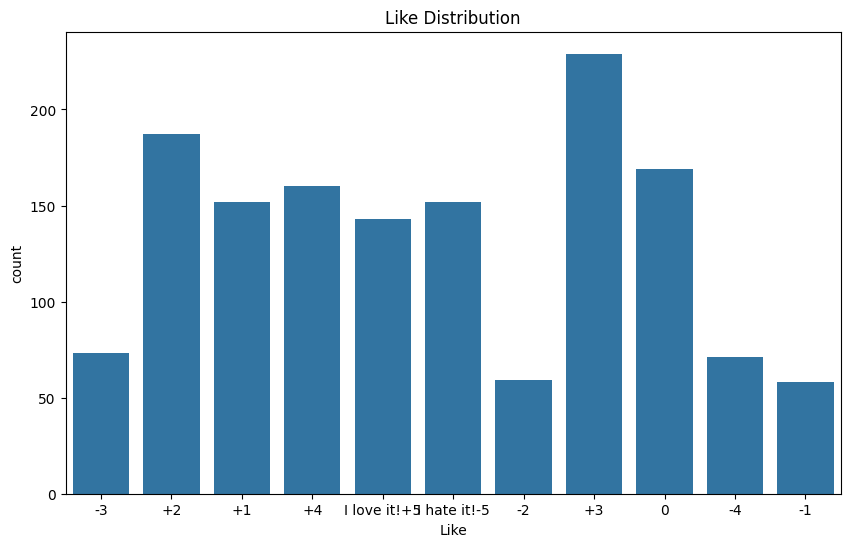

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Visit Frequency Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='VisitFrequency', data=data)
plt.title('Visit Frequency Distribution')
plt.show()

# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Like Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Like', data=data)
plt.title('Like Distribution')
plt.show()

STEP 3 : Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data, columns=['Gender', 'Like'], drop_first=True)

# Identify columns with non-numeric data
non_numeric_cols = data_encoded.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric (replace 'No' with 0 and other values with 1 for example)
for col in non_numeric_cols:
    data_encoded[col] = data_encoded[col].apply(lambda x: 0 if x == 'No' else 1)  # Adjust the conversion logic as needed

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Check the scaled data
pd.DataFrame(data_scaled, columns=data_encoded.columns).head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like_+2,Like_+3,Like_+4,Like_-1,Like_-2,Like_-3,Like_-4,Like_0,Like_I hate it!-5,Like_I love it!+5
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


STEP 4 : Extracting Segments

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

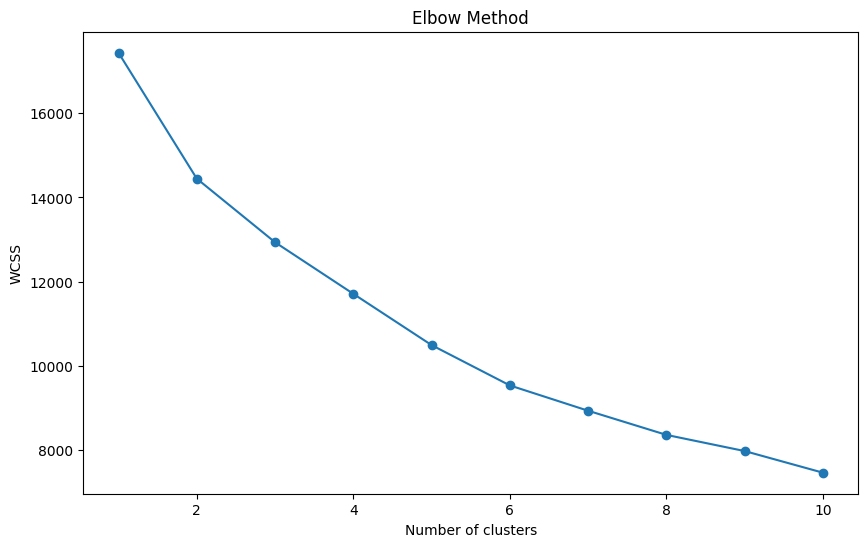

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the chosen number of clusters
optimal_clusters = 4  # Assuming 4 from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Segment'] = kmeans.fit_predict(data_scaled)


STEP 5 : Profiling Segments

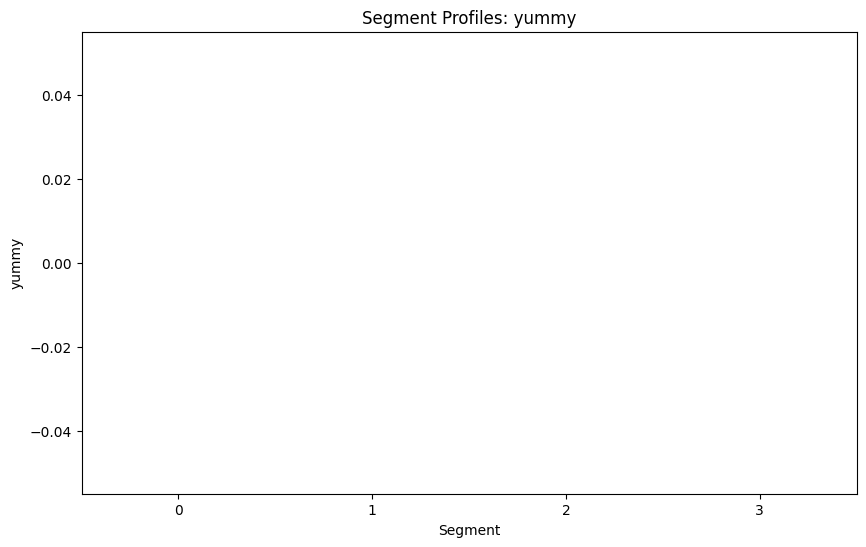

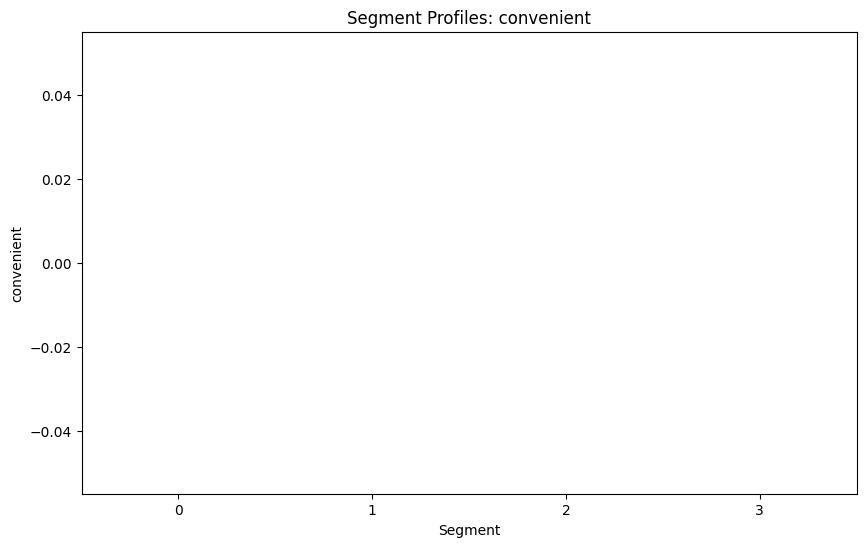

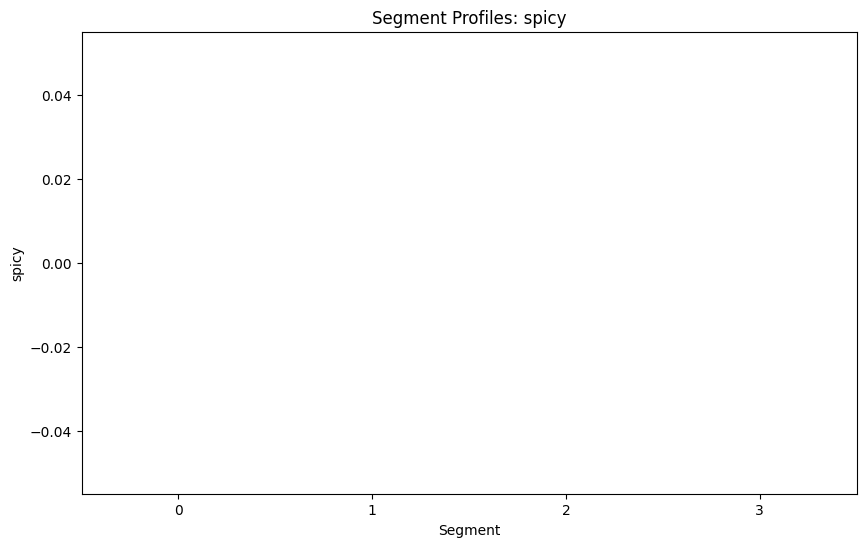

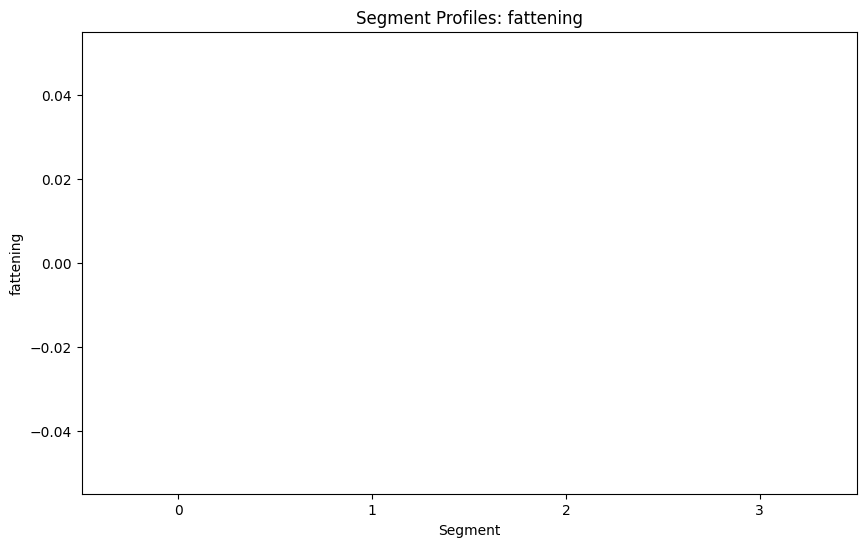

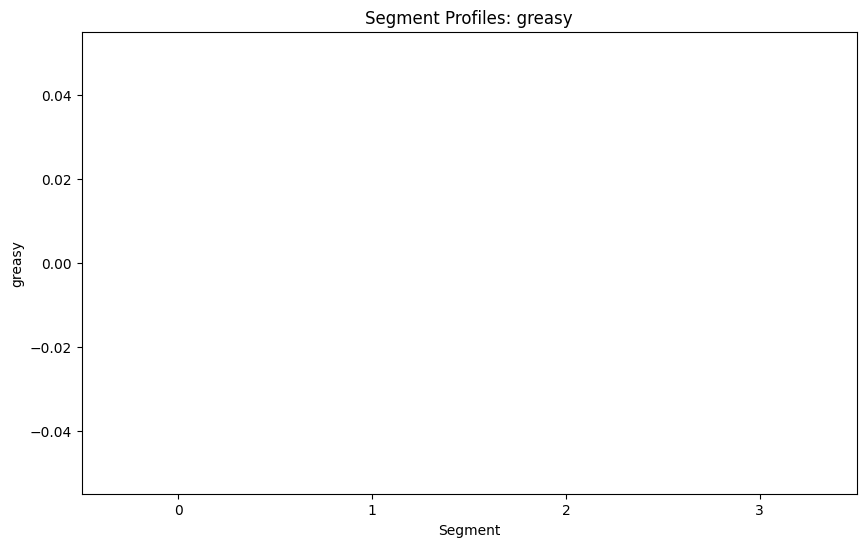

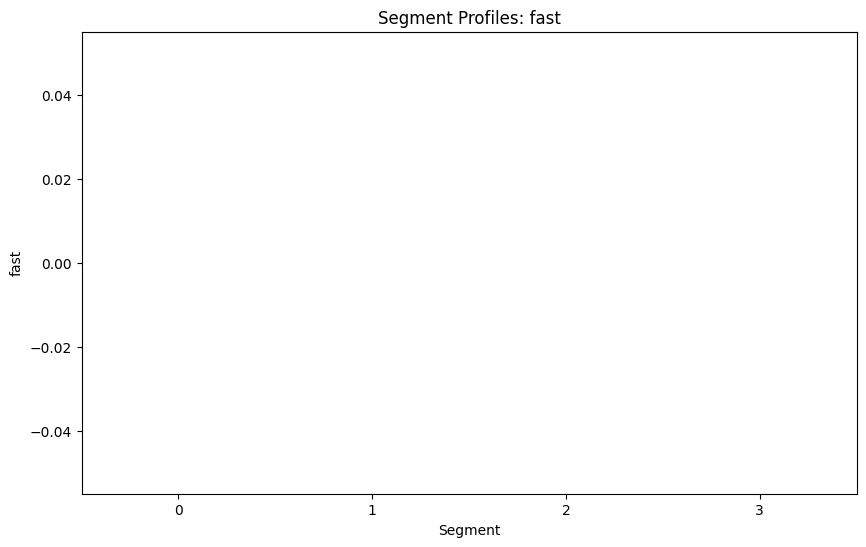

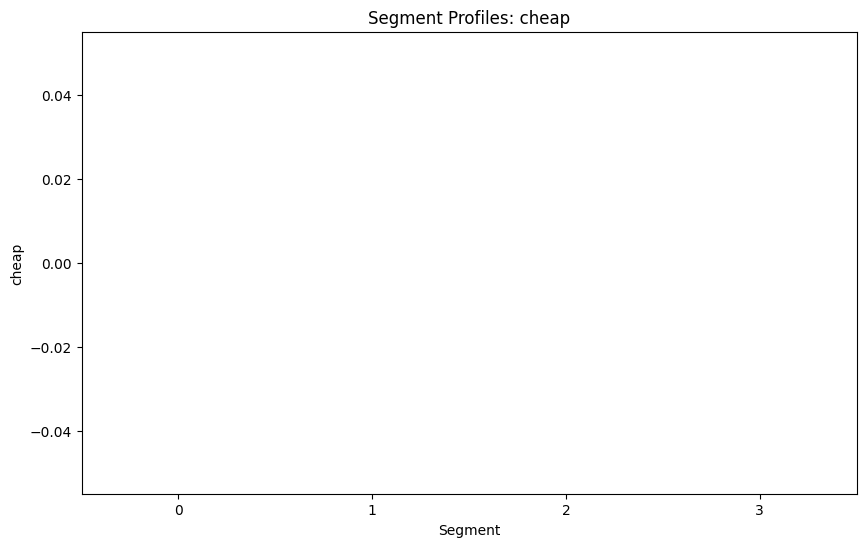

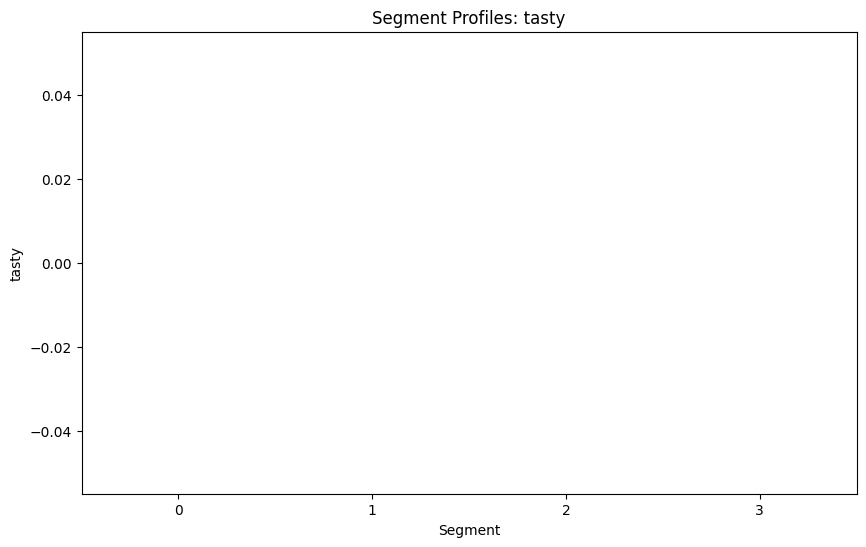

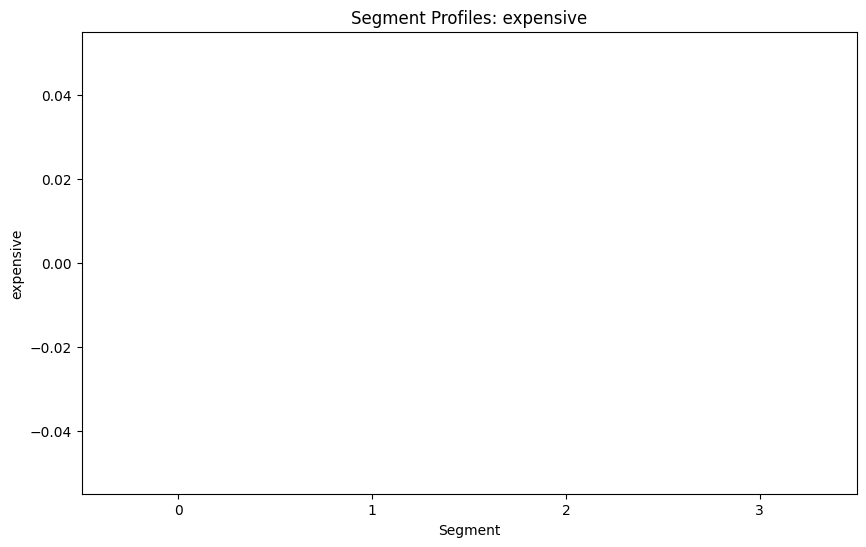

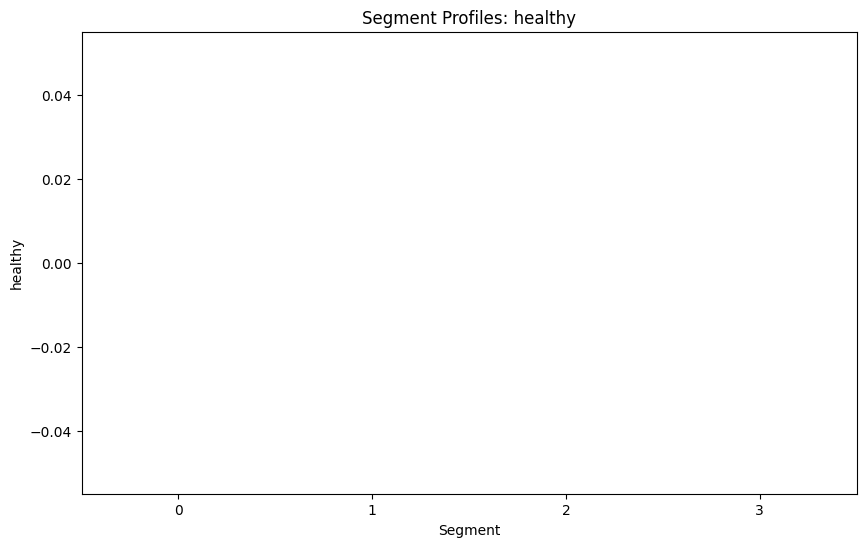

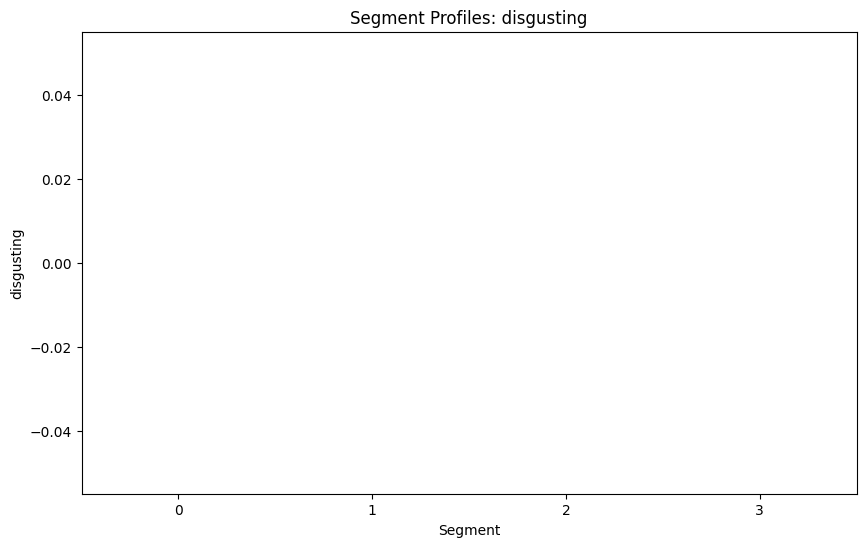

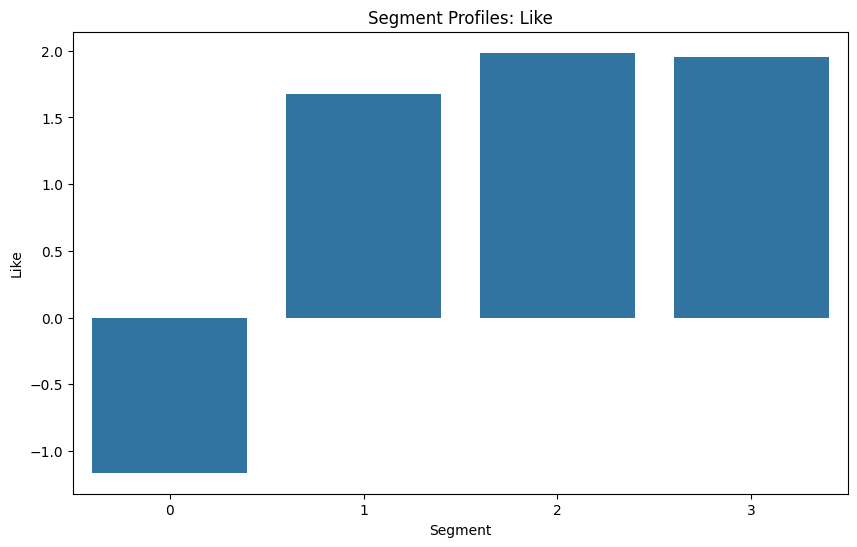

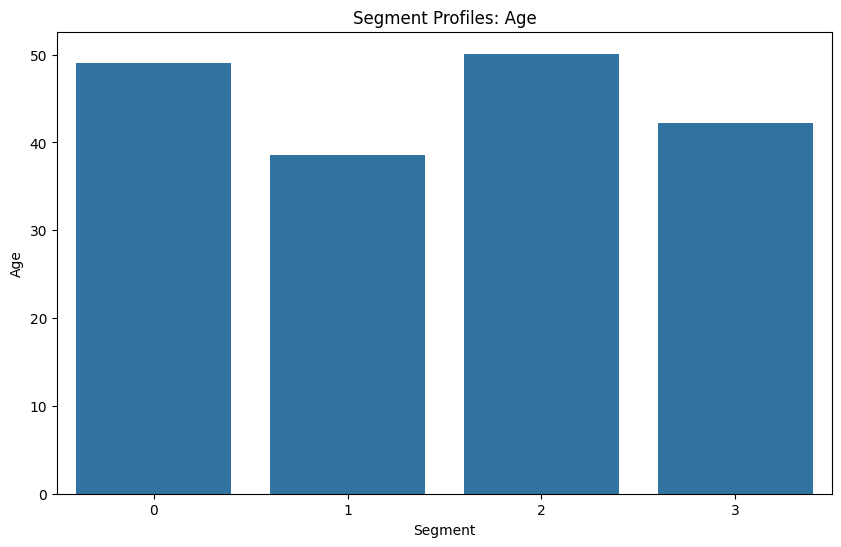

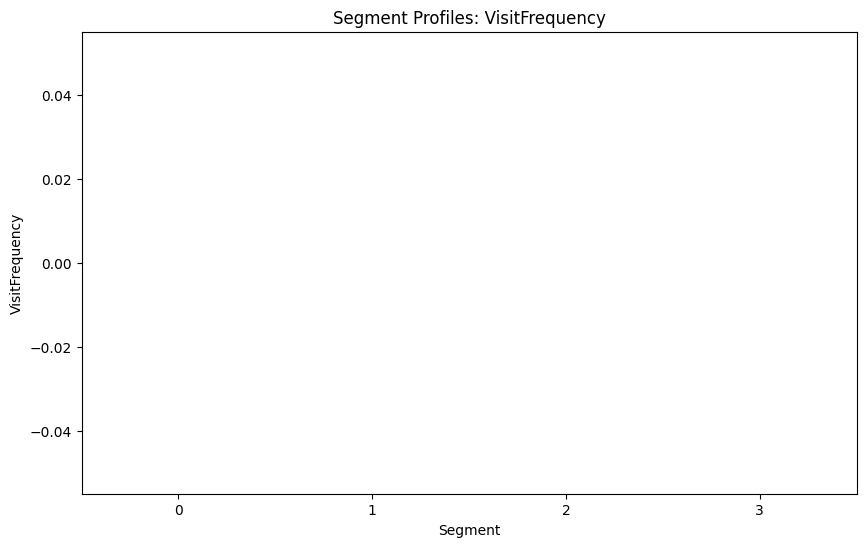

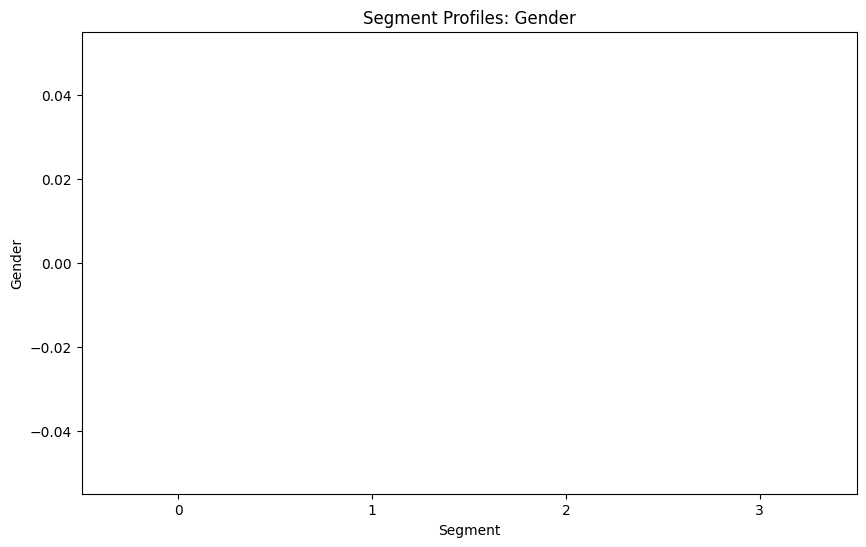

In [ ]:
# Profile each segment
segment_profiles = data.groupby('Segment').agg(lambda x: pd.to_numeric(x, errors='coerce').mean())
segment_profiles

# Visualize segment profiles
for column in segment_profiles.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=segment_profiles.index, y=segment_profiles[column])
    plt.title(f'Segment Profiles: {column}')
    plt.show()


In [ ]:
# Apply K-means clustering with the chosen number of clusters
optimal_clusters = 4  # Assuming 4 from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Segment'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
data_pca['Segment'] = data['Segment']


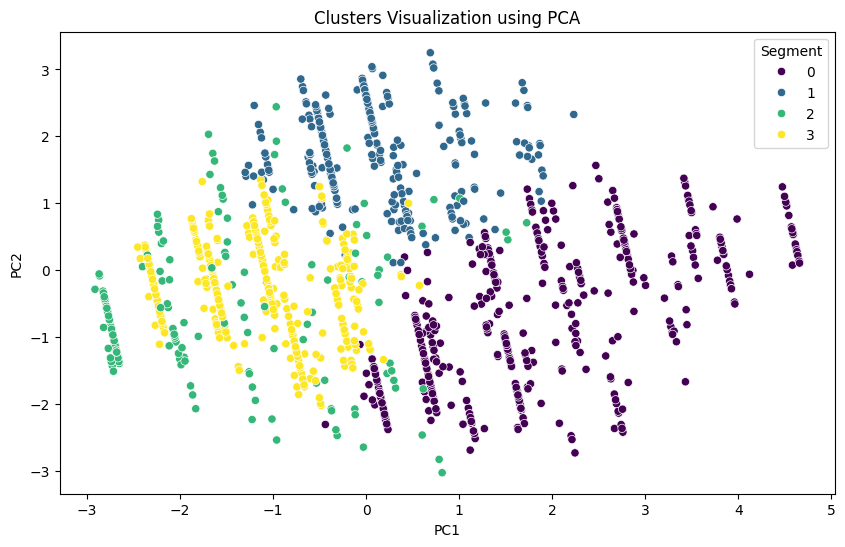

In [ ]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Segment', data=data_pca, palette='viridis')
plt.title('Clusters Visualization using PCA')
plt.show()

STEP 6 : Describing Segments

In [ ]:
for segment in data['Segment'].unique():
    print(f"Segment {segment} Summary:")
    print(data[data['Segment'] == segment].describe())
    print("\n")


Segment 0 Summary:
              Age  Segment
count  467.000000    467.0
mean    49.040685      0.0
std     12.633343      0.0
min     18.000000      0.0
25%     39.500000      0.0
50%     51.000000      0.0
75%     60.000000      0.0
max     70.000000      0.0


Segment 1 Summary:
              Age  Segment
count  304.000000    304.0
mean    38.565789      1.0
std     12.827709      0.0
min     18.000000      1.0
25%     28.000000      1.0
50%     37.000000      1.0
75%     48.000000      1.0
max     70.000000      1.0


Segment 3 Summary:
              Age  Segment
count  508.000000    508.0
mean    42.259843      3.0
std     14.808954      0.0
min     18.000000      3.0
25%     29.000000      3.0
50%     40.500000      3.0
75%     56.000000      3.0
max     70.000000      3.0


Segment 2 Summary:
              Age  Segment
count  174.000000    174.0
mean    50.097701      2.0
std     13.149944      0.0
min     22.000000      2.0
25%     40.250000      2.0
50%     52.000000      2.0


STEP 7 : Selecting Target Segments

In [ ]:
# Select the segment with the highest expensive
target_segment = segment_profiles['expensive'].idxmax()
print(f"Target Segment: {target_segment}")

# Further inspect the target segment
target_segment_data = data[data['Segment'] == target_segment]
target_segment_data.describe()


Target Segment: nan


,Age,Segment
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


STEP 8 : Customizing the Marketing Mix

In [ ]:
marketing_mix = {
    'Product': 'Custom menu items tailored to the preferences of the target segment.',
    'Price': 'Competitive pricing with combo deals to attract frequent visitors.',
    'Place': 'Focus on locations preferred by the target segment.',
    'Promotion': 'Use targeted marketing campaigns on social media and loyalty programs.'
}

print("Marketing Mix for the Target Segment:")
for key, value in marketing_mix.items():
    print(f"{key}: {value}")


Marketing Mix for the Target Segment:
Product: Custom menu items tailored to the preferences of the target segment.
Price: Competitive pricing with combo deals to attract frequent visitors.
Place: Focus on locations preferred by the target segment.
Promotion: Use targeted marketing campaigns on social media and loyalty programs.
